In [2]:
import numpy as np
import pandas as pd
from datetime import datetime 
from datetime import timedelta
import csv 
import matplotlib.pyplot as plt
from datetime import date
from datetime import time
from sklearn.datasets import load_iris
import matplotlib.dates as mdates
from matplotlib.transforms import Transform
from matplotlib.ticker import (
    AutoLocator, AutoMinorLocator)
import seaborn as sns
from matplotlib import pyplot

In [3]:
def convertTimeStamp(string):
    """Converts a string to a datetime object.
    """
    time = datetime.strptime(string,'%m/%d/%Y %I:%M:%S %p') #Accepts time string, converts it to datetime object.
    return time

In [4]:
def secToDays(seconds):
    """Converts seconds to days"""
    seconds_in_day = 60 * 60 * 24
    seconds_in_hour = 60 * 60
    seconds_in_minute = 60

    days = seconds // seconds_in_day
    hours = (seconds - (days * seconds_in_day)) // seconds_in_hour
    minutes = (seconds - (days * seconds_in_day) - (hours * seconds_in_hour)) // seconds_in_minute

    return int(days)

In [5]:
def days_analysis(filepath1, filepath2, filepath3):   
    """Calculates and compares elapsed day trends between neighborhood council regions, council districts, and council members"""
    
    #read csv files
    df1 = pd.read_csv(filepath1)
    df2 = pd.read_csv(filepath2)
    df3 = pd.read_csv(filepath3)
    
    #concatonate inputed dataframes
    dfs = [df1, df2, df3]
    dataframe = pd.concat(dfs)
    dataframe = dataframe.dropna()
    
    dataframe = dataframe.dropna()
    
    #create dataframes of unique CDMembers, CDs, and NCs
    df_members = dataframe['CDMember'].dropna().unique()
    
    df_regions = dataframe['CD'].dropna().unique()
    df_regions = np.sort(df_regions)
                        
    df_neighborhoods = dataframe['NC'].dropna().unique()
    df_neighborhoods = np.sort(df_neighborhoods)
    
    
    created_df = dataframe['CreatedDate'].dropna().apply(convertTimeStamp, 0) #apply convertTimeStamp to CreatedDate
    updated_df = dataframe['UpdatedDate'].dropna().apply(convertTimeStamp, 0) #apply convertTimeStamp to UpdatedDate
    elapsed_df = updated_df - created_df #calculate the difference in the values in CreatedDate and UpdatedDate
    time_df = [created_df, updated_df, elapsed_df] #combinedataframes created_df, updated_df, elapsed_df into one dataframe
    
    dataframe.insert(3, "ElapsedTime", elapsed_df) #insert column ElapsedTime with dataframe elapsed_df into dataframe dataframe
    
    
    elapsed_seconds = dataframe['ElapsedTime'].dt.total_seconds()
    elapsed_days = elapsed_seconds.apply(secToDays) #or display time 1 in a new column in for loop
    dataframe.insert(4, 'Elapsed Days', elapsed_days)
    
    xdays = dataframe['Elapsed Days'].dropna().unique() #create a dataframe of unique day values
    xdays = np.sort(xdays)
    
    df = dataframe[['CD', 'CDMember', 'NC', 'Elapsed Days']]
    df = df.sort_values('NC')
    
    #calculate total cells with elapsed day x, find percentage of each unique CD and NC in the total
    len_cells = len(dataframe.index)

    #create dataframe with # of NC regions for each elapsed day x till xdays[:15]
    #create and concatonate dataframe for elapsed days after xdays[:15]
    is_days2 = dataframe['Elapsed Days'] > xdays[90]
    df_days2 = dataframe[is_days2]
    len_day = len(df_days2)

    unique_NC2 = df_days2['NC'].unique()
    row_NC2count = pd.Series(['>90', len(unique_NC2)])
    df2_row = pd.DataFrame([row_NC2count])
    
    NC_num = list()
    df_NCcount = pd.DataFrame()
    for x in xdays[:91]:
        is_days = dataframe['Elapsed Days'] == x
        df_days = dataframe[is_days]
        len_day = len(df_days.index)
        unique_NC = df_days['NC'].unique()
        row_NCcount = pd.Series([x, len(unique_NC)])
        df_row = pd.DataFrame([row_NCcount])
        df_NCcount = pd.concat([df_NCcount,df_row],ignore_index=True)
    df_NCcount = pd.concat([df_NCcount,df2_row],ignore_index=True)
    df_NCcount.columns = ['Elapsed Days (first 90 days)', '# of NC Regions']
    print(df_NCcount)
    
    ax = df_NCcount.plot.bar(x='Elapsed Days (first 90 days)', y='# of NC Regions', figsize=(15,10)) #plot Elapsed days vs NCs
    
    
    #calculate distribution of CD Members
    is_days2 = dataframe['Elapsed Days'] > xdays[90]
    df_days2 = dataframe[is_days2]
    len_day = len(df_days2)

    unique_mem2 = df_days2['CDMember'].unique()
    row_mem2count = pd.Series(['>90', len(unique_mem2)])
    df2_row = pd.DataFrame([row_mem2count])
    
    mem_num = list()
    df_memCount = pd.DataFrame()
    for x in xdays[:91]:
        is_days = dataframe['Elapsed Days'] == x
        df_days = dataframe[is_days]
        len_day = len(df_days.index)
        unique_mem = df_days['CDMember'].unique()
        row_memCount = pd.Series([x, len(unique_mem)])
        df_row = pd.DataFrame([row_memCount])
        df_memCount = pd.concat([df_memCount,df_row],ignore_index=True)
    df_memCount = pd.concat([df_memCount,df2_row],ignore_index=True)
    df_memCount.columns = ['Elapsed Days (first 90 days)', '# of Council Members']
    print(df_memCount)
    
    ax = df_memCount.plot.bar(x='Elapsed Days (first 90 days)', y='# of Council Members', figsize=(15,10)) #plot Elapsed days vs CDMembers
    
    #calculate distribution of CD Districts
    is_days2 = dataframe['Elapsed Days'] > xdays[90]
    df_days2 = dataframe[is_days2]
    len_day = len(df_days2)

    unique_dist2 = df_days2['CD'].unique()
    row_dist2count = pd.Series(['>90', len(unique_dist2)])
    df2_row = pd.DataFrame([row_dist2count])
    
    dist_num = list()
    df_distCount = pd.DataFrame()
    for x in xdays[:91]:
        is_days = dataframe['Elapsed Days'] == x
        df_days = dataframe[is_days]
        len_day = len(df_days.index)
        unique_dist = df_days['CD'].unique()
        row_distCount = pd.Series([x, len(unique_dist)])
        df_row = pd.DataFrame([row_distCount])
        df_distCount = pd.concat([df_distCount,df_row],ignore_index=True)
    df_distCount = pd.concat([df_distCount,df2_row],ignore_index=True)
    df_distCount.columns = ['Elapsed Days (first 90 days)', '# of Council Districts']
    print(df_distCount)
    
    ax = df_distCount.plot.bar(x='Elapsed Days (first 90 days)', y='# of Council Districts', figsize=(15,10)) #plot Elapsed days vs CDs
    
    
    
        

C:\Users\hanaa\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3249: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
C:\Users\hanaa\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3249: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
C:\Users\hanaa\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  # This is added back by InteractiveShellApp.init_path()


   Elapsed Days (first 90 days)  # of NC Regions
0                             0              103
1                             1              103
2                             2              102
3                             3              101
4                             4              101
..                          ...              ...
87                           87               17
88                           88               15
89                           89               15
90                           90               10
91                          >90               78

[92 rows x 2 columns]
   Elapsed Days (first 90 days)  # of Council Members
0                             0                    17
1                             1                    17
2                             2                    17
3                             3                    17
4                             4                    17
..                          ...                   ...
87         

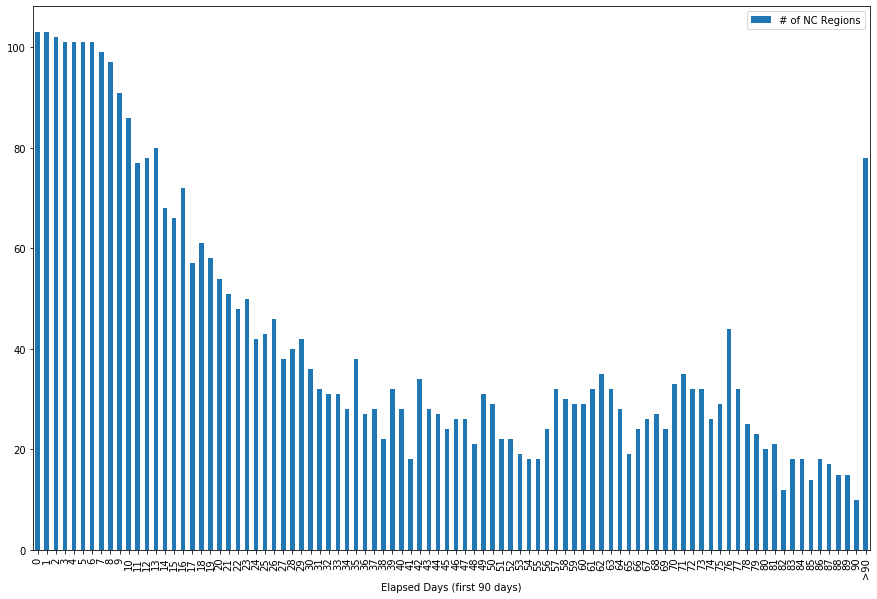

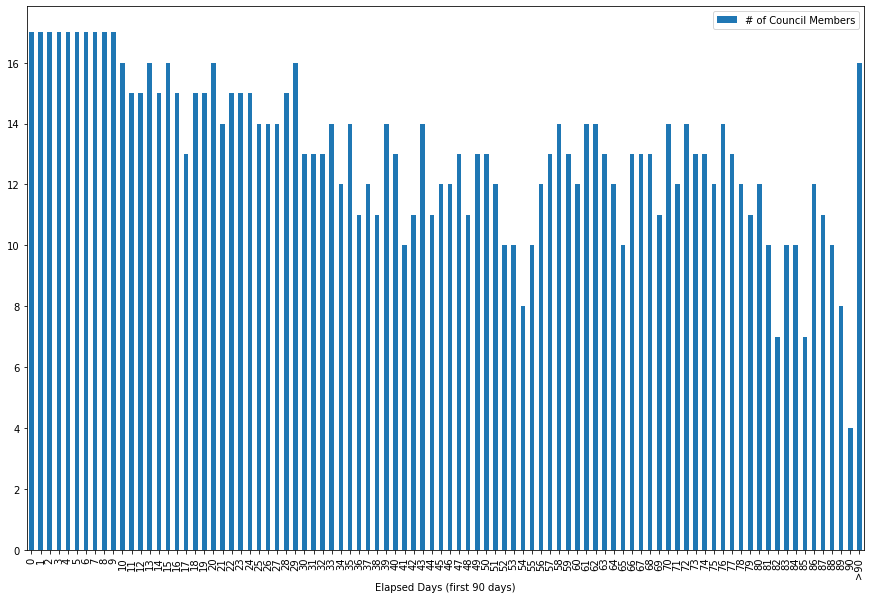

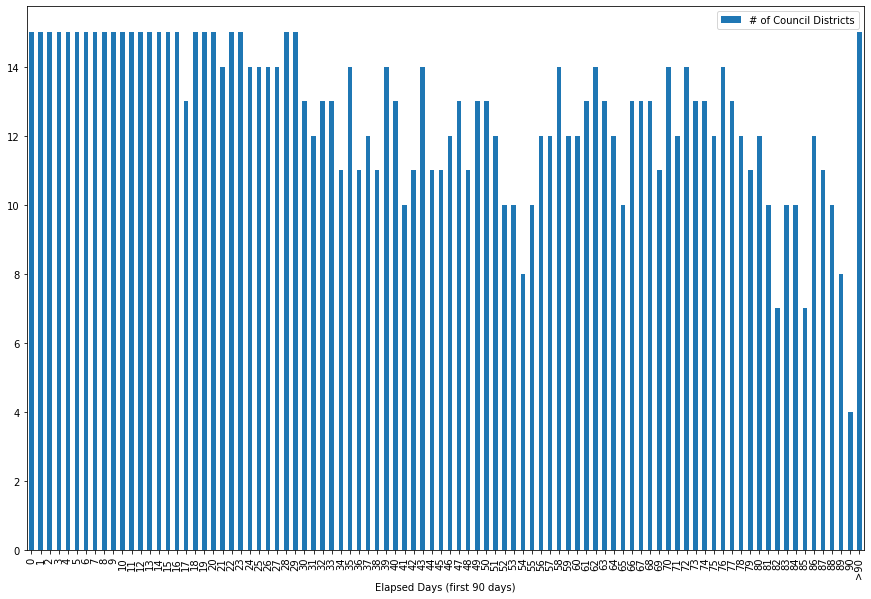

In [6]:
days_analysis(r"C:\Users\hanaa\Downloads\MyLA311_Service_Request_Data_2017.csv", r"C:\Users\hanaa\Downloads\MyLA311_Service_Request_Data_2018.csv", r"C:\Users\hanaa\Downloads\MyLA311_Service_Request_Data_2019.csv")